## IMPORT DATA

In [2]:
# Clone repositori GitHub yang berisi dataset
# Tanda "!" berarti kita menjalankan perintah shell/terminal
!git clone https://github.com/huseinsm/IS-Kelompok-3.git

# Pindah ke direktori yang relevan (opsional, tapi membuat path lebih pendek)
%cd IS-Kelompok-3

fatal: destination path 'IS-Kelompok-3' already exists and is not an empty directory.
/content/IS-Kelompok-3


In [3]:
# Import library utama untuk manipulasi data dan visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Import library untuk pemrosesan teks (NLP)
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# Pengaturan tambahan untuk visualisasi yang lebih baik
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.set_context('talk')

print("✅ Library berhasil diimpor!")

✅ Library berhasil diimpor!


In [4]:
# Path ke file data mentah yang berukuran besar
raw_data_path = '/content/IS-Kelompok-3/datasets/raw/Sarkas_Raw/reddit_indonesia_sarcastic.json'

# Membaca file JSON Lines ke dalam DataFrame Pandas
# 'lines=True' sangat penting karena setiap baris adalah objek JSON yang terpisah
print("Memuat dataset mentah... Proses ini mungkin memakan waktu beberapa menit.")
df = pd.read_json(raw_data_path, lines=True)
print("Dataset berhasil dimuat!")

# Mengatur Pandas agar menampilkan teks penuh dalam kolom
pd.set_option('display.max_colwidth', None)

Memuat dataset mentah... Proses ini mungkin memakan waktu beberapa menit.
Dataset berhasil dimuat!


## TRANSFORMASI DATA

In [5]:
# Tampilkan informasi dasar DataFrame
# show_counts=True memberikan jumlah non-null yang akurat untuk dataset besar
print("Informasi DataFrame:")
df.info(show_counts=True)
print("\n" + "="*50 + "\n")

# Cek apakah ada nilai yang hilang (missing values)
print("Jumlah nilai yang hilang per kolom:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Tampilkan 5 baris pertama untuk melihat sampel data
print("Contoh 5 baris pertama data:")
df.head()

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 2619864 entries, 0 to 2619863
dtypes: object(2619864)
memory usage: 20.0+ MB


Jumlah nilai yang hilang per kolom:
0          0
1          0
2          0
3          0
4          0
          ..
2619859    0
2619860    0
2619861    0
2619862    0
2619863    0
Length: 2619864, dtype: int64


Contoh 5 baris pertama data:


,0,1,2,3,4,5,6,7,8,9,...,2619854,2619855,2619856,2619857,2619858,2619859,2619860,2619861,2619862,2619863
0,"{'author': 'Portonestro', 'created_utc': 1577836851, 'score': 2, 'permalink': '/r/indonesia/comments/ei5lqs/happy_new_year_komodos/fconr9t/', 'subreddit': 'indonesia', 'body': 'Selamat tahun baru', 'lang_fastText': 'id', 'label': 0, 'text': 'Selamat tahun baru'}","{'author': 'elhaha1001', 'created_utc': 1577837466, 'score': 1, 'permalink': '/r/indonesia/comments/ei4vic/reddit_di_unban/fcoold0/', 'subreddit': 'indonesia', 'body': 'sekarang pake dns apa sih yg bisa?', 'lang_fastText': 'id', 'label': 0, 'text': 'sekarang pake dns apa sih yg bisa?'}","{'author': 'digitalsunshine', 'created_utc': 1577837514, 'score': 1, 'permalink': '/r/indonesia/comments/ei60gv/01_january_2020_daily_chat_thread/fcoonr2/', 'subreddit': 'indonesia', 'body': 'Komentarnya wow banget', 'lang_fastText': 'id', 'label': 0, 'text': 'Komentarnya wow banget'}","{'author': 'than4t0s', 'created_utc': 1577837523, 'score': 2, 'permalink': '/r/indonesia/comments/ei60gv/01_january_2020_daily_chat_thread/fcooo7j/', 'subreddit': 'indonesia', 'body': 'biasa 1 atau 2 taunan sih, cmn gak pernah se extreme ini', 'lang_fastText': 'id', 'label': 0, 'text': 'biasa 1 atau 2 taunan sih, cmn gak pernah se extreme ini'}","{'author': 'Styxriv', 'created_utc': 1577837871, 'score': 1, 'permalink': '/r/indonesia/comments/ei2c4b/azab_memakan_indomie/fcop5hg/', 'subreddit': 'indonesia', 'body': 'Flair religionnya tolong.', 'lang_fastText': 'ms', 'label': 0, 'text': 'Flair religionnya tolong.'}","{'author': 'Choppedcity', 'created_utc': 1577838110, 'score': 1, 'permalink': '/r/indonesia/comments/ei60gv/01_january_2020_daily_chat_thread/fcoph2s/', 'subreddit': 'indonesia', 'body': 'Mau meng nya :(', 'lang_fastText': 'id', 'label': 0, 'text': 'Mau meng nya :('}","{'author': 'Wey-Yu', 'created_utc': 1577838230, 'score': -1, 'permalink': '/r/indonesia/comments/ei60gv/01_january_2020_daily_chat_thread/fcopmz1/', 'subreddit': 'indonesia', 'body': 'Ga msk hitungan sih, karena ga berhubungan dngn iklim, tapi atasan2 gw disini pada nyebelin smua kecuali satu. Serasa kyk kebakar jga hahaha', 'lang_fastText': 'id', 'label': 0, 'text': 'Ga msk hitungan sih, karena ga berhubungan dngn iklim, tapi atasan2 gw disini pada nyebelin smua kecuali satu. Serasa kyk kebakar jga hahaha'}","{'author': 'baldpikachu', 'created_utc': 1577838350, 'score': 4, 'permalink': '/r/indonesia/comments/ei60gv/01_january_2020_daily_chat_thread/fcopstd/', 'subreddit': 'indonesia', 'body': 'apakah jika hari ini bukan hari libur, para perusahaan bakal memaklumi kalo karyawannya pada ga dateng karena banjir?', 'lang_fastText': 'id', 'label': 0, 'text': 'apakah jika hari ini bukan hari libur, para perusahaan bakal memaklumi kalo karyawannya pada ga dateng karena banjir?'}","{'author': 'draizze', 'created_utc': 1577838352, 'score': 64, 'permalink': '/r/indonesia/comments/eiaidu/banjir_jakarta/fcopsx7/', 'subreddit': 'indonesia', 'body': 'Itu karena hujannya tidak smart. Nanti dibikinkan, smart rain system, bisa ngatur curah hujan sendiri dan di mana jatuhnya.', 'lang_fastText': 'id', 'label': 0, 'text': 'Itu karena hujannya tidak smart. Nanti dibikinkan, smart rain system, bisa ngatur curah hujan sendiri dan di mana jatuhnya.'}","{'author': 'monopecez', 'created_utc': 1577838530, 'score': 8, 'permalink': '/r/indonesia/comments/ei60gv/01_january_2020_daily_chat_thread/fcoq1ru/', 'subreddit': 'indonesia', 'body': 'Banjir itu basah, mana ada kering-anan. Hmmmmmm', 'lang_fastText': 'id', 'label': 0, 'text': 'Banjir itu basah, mana ada kering-anan. Hmmmmmm'}",...,"{'author': 'lebaran', 'created_utc': 1696118034.0, 'score': 1, 'permalink': '/r/indonesia/comments/16w2ily/gimana_cara_komodos_sekalian_berhemat_energi/k2xl91v/', 'subreddit': 'indonesia', 'body': 'Untuk AC sih bagusnya nggak dimatikan dengan memutus aliran arusnya, apabila saat AC dimatikan dengan remote ada jedanya (biasanya sih ini prosedur mensirkulasikan peluma

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 2619864 entries, 0 to 2619863
dtypes: object(2619864)
memory usage: 20.0+ MB


In [7]:
import json

# 1. Ambil satu-satunya baris yang ada. Ini akan menjadi Pandas Series.
data_series = df.iloc[0]

# 2. Ubah setiap sel (yang berisi teks JSON) menjadi objek dictionary Python.
# .apply(json.loads) akan menjalankan fungsi json.loads pada setiap sel.
list_of_dicts = data_series.tolist()

# 3. Buat DataFrame baru yang rapi dari list berisi dictionary tersebut.
df_rapi = pd.DataFrame(list_of_dicts)


# --- Verifikasi Hasil ---
print("✅ Transformasi Selesai!")
print("Struktur DataFrame yang baru dan rapi:")
df_rapi.info()

print("\nContoh 5 baris pertama:")
df_rapi.head()

✅ Transformasi Selesai!
Struktur DataFrame yang baru dan rapi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619864 entries, 0 to 2619863
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   author         object 
 1   created_utc    float64
 2   score          int64  
 3   permalink      object 
 4   subreddit      object 
 5   body           object 
 6   lang_fastText  object 
 7   label          int64  
 8   text           object 
dtypes: float64(1), int64(2), object(6)
memory usage: 179.9+ MB

Contoh 5 baris pertama:


,author,created_utc,score,permalink,subreddit,body,lang_fastText,label,text
0,Portonestro,1.577837e+09,2,/r/indonesia/comments/ei5lqs/happy_new_year_komodos/fconr9t/,indonesia,Selamat tahun baru,id,0,Selamat tahun baru
1,elhaha1001,1.577837e+09,1,/r/indonesia/comments/ei4vic/reddit_di_unban/fcoold0/,indonesia,sekarang pake dns apa sih yg bisa?,id,0,sekarang pake dns apa sih yg bisa?
2,digitalsunshine,1.577838e+09,1,/r/indonesia/comments/ei60gv/01_january_2020_daily_chat_thread/fcoonr2/,indonesia,Komentarnya wow banget,id,0,Komentarnya wow banget
3,than4t0s,1.577838e+09,2,/r/indonesia/comments/ei60gv/01_january_2020_daily_chat_thread/fcooo7j/,indonesia,"biasa 1 atau 2 taunan sih, cmn gak pernah se extreme ini",id,0,"biasa 1 atau 2 taunan sih, cmn gak pernah se extreme ini"
4,Styxriv,1.577838e+09,1,/r/indonesia/comments/ei2c4b/azab_memakan_indomie/fcop5hg/,indonesia,Flair religionnya tolong.,ms,0,Flair religionnya tolong.


## DISTRIBUSI LABEL

Distribusi Kelas:
label
0    2616335
1       3529
Name: count, dtype: int64

Persentase kelas 1 (Sarkastik): 0.13%
Persentase kelas 0 (Non-Sarkastik): 99.87%


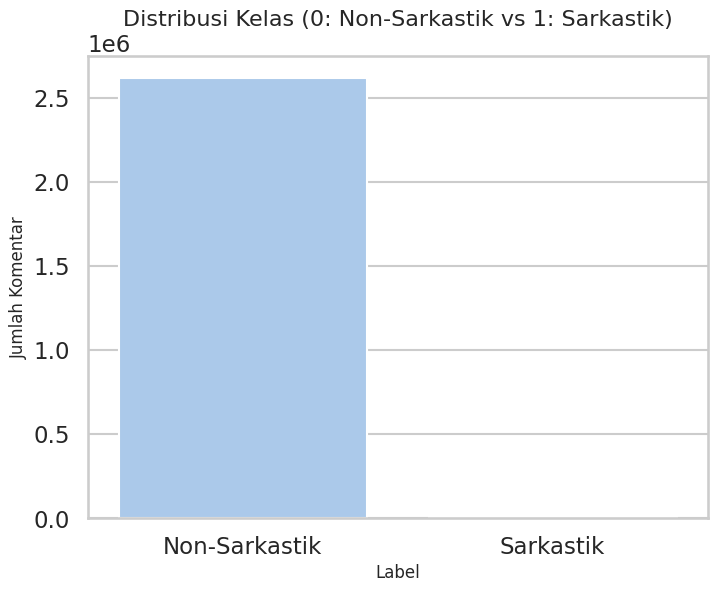

In [8]:
# Hitung jumlah masing-masing kelas
class_counts = df_rapi['label'].value_counts()
print("Distribusi Kelas:")
print(class_counts)
print(f"\nPersentase kelas 1 (Sarkastik): {class_counts[1] / len(df_rapi) * 100:.2f}%")
print(f"Persentase kelas 0 (Non-Sarkastik): {class_counts[0] / len(df_rapi) * 100:.2f}%")

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(data=df_rapi, x='label')
plt.title('Distribusi Kelas (0: Non-Sarkastik vs 1: Sarkastik)', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Jumlah Komentar', fontsize=12)
plt.xticks([0, 1], ['Non-Sarkastik', 'Sarkastik']) # Memberi nama yang jelas pada sumbu x
plt.show()

## PANJANG DAN DISTRIBUSI TEKS

In [9]:
from tqdm.notebook import tqdm

# Pastikan df adalah DataFrame Anda yang sudah di-transformasi dengan benar
# (jutaan baris, beberapa kolom)

print("Memulai analisis panjang teks dengan metode hemat memori...")

# 1. Siapkan list kosong untuk menampung hasilnya
char_lengths = []
word_counts = []

# 2. Lakukan iterasi pada setiap teks di kolom 'body' atau 'text'
# tqdm akan memberikan progress bar yang membantu
for text in tqdm(df_rapi['body']): # Ganti 'body' dengan 'text' jika nama kolomnya 'text'
    # Hitung panjang karakter dan tambahkan ke list
    char_lengths.append(len(text))
    # Hitung jumlah kata dan tambahkan ke list
    word_counts.append(len(text.split()))

# 3. Setelah loop selesai, tambahkan list tersebut sebagai kolom baru di DataFrame
df_rapi['char_length'] = char_lengths
df_rapi['word_count'] = word_counts

print("\n✅ Analisis panjang teks selesai!")
print("Kolom 'char_length' dan 'word_count' berhasil ditambahkan.")

# Tampilkan hasilnya untuk verifikasi
df_rapi[['body', 'char_length', 'word_count']].head() # Ganti 'body' dengan 'text'

Memulai analisis panjang teks dengan metode hemat memori...


  0%|          | 0/2619864 [00:00<?, ?it/s]


✅ Analisis panjang teks selesai!
Kolom 'char_length' dan 'word_count' berhasil ditambahkan.


,text,char_length,word_count
0,Selamat tahun baru,18,3
1,sekarang pake dns apa sih yg bisa?,34,7
2,Komentarnya wow banget,22,3
3,"biasa 1 atau 2 taunan sih, cmn gak pernah se extreme ini",56,12
4,Flair religionnya tolong.,25,3


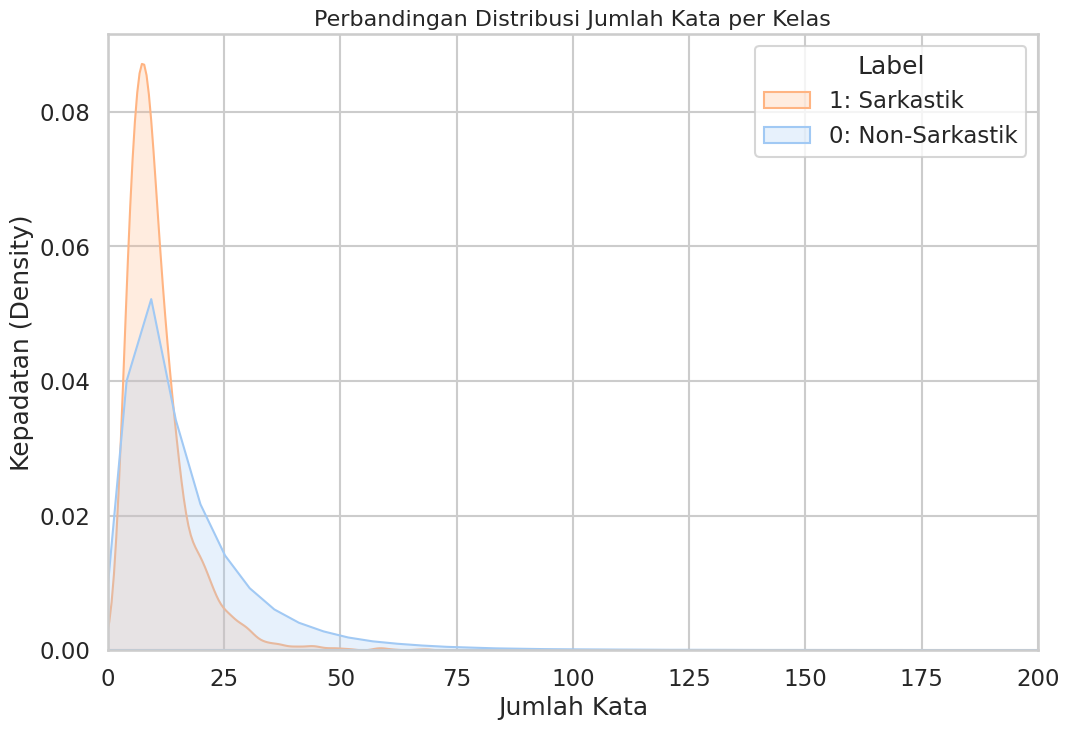

In [10]:
# Membandingkan distribusi jumlah kata untuk setiap kelas
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_rapi, x='word_count', hue='label', fill=True, common_norm=False)
plt.title('Perbandingan Distribusi Jumlah Kata per Kelas', fontsize=16)
plt.xlabel('Jumlah Kata')
plt.ylabel('Kepadatan (Density)')
plt.legend(title='Label', labels=['1: Sarkastik', '0: Non-Sarkastik'])
plt.xlim(0, 200) # Batasi sumbu x untuk visualisasi yang lebih jelas
plt.show()

In [11]:
# Menghitung rata-rata jumlah karakter per komentar
avg_char_length = df_rapi['char_length'].mean()

# Menghitung rata-rata jumlah kata per komentar
avg_word_count = df_rapi['word_count'].mean()

print(f"Rata-rata Panjang Karakter per Komentar: {avg_char_length:.2f}")
print(f"Rata-rata Panjang Kata per Komentar: {avg_word_count:.2f}")

Rata-rata Panjang Karakter per Komentar: 103.77
Rata-rata Panjang Kata per Komentar: 16.83


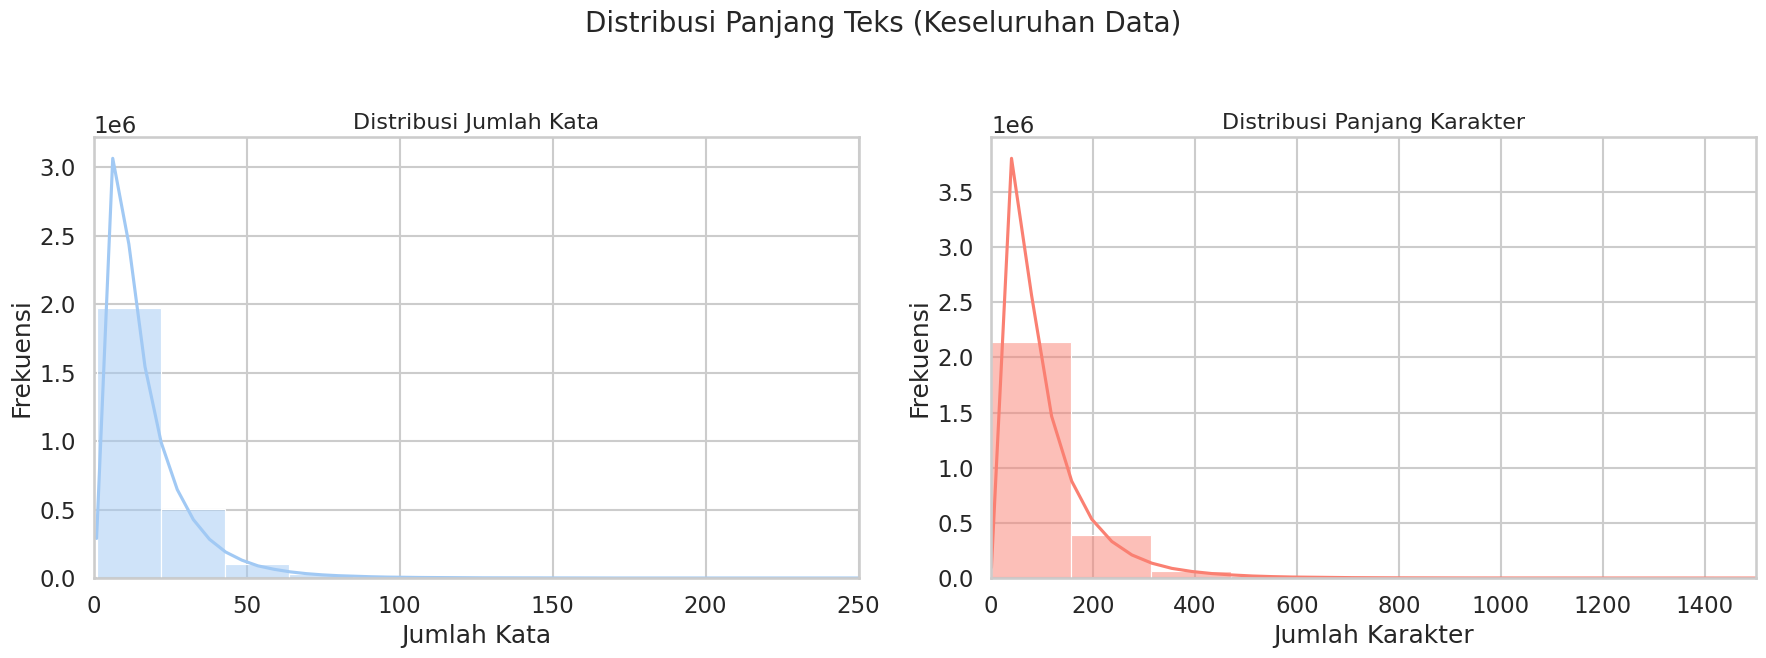

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran gambar agar lebih besar dan jelas
plt.figure(figsize=(18, 7))

# Membuat subplot untuk dua grafik
# Grafik 1: Distribusi Jumlah Kata
plt.subplot(1, 2, 1)
sns.histplot(df_rapi['word_count'], bins=50, kde=True)
plt.title('Distribusi Jumlah Kata', fontsize=16)
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.xlim(0, 250)  # Memberi batas sumbu X agar grafik lebih fokus dan mudah dibaca

# Grafik 2: Distribusi Jumlah Karakter
plt.subplot(1, 2, 2)
sns.histplot(df_rapi['char_length'], bins=50, kde=True, color='salmon')
plt.title('Distribusi Panjang Karakter', fontsize=16)
plt.xlabel('Jumlah Karakter')
plt.ylabel('Frekuensi')
plt.xlim(0, 1500) # Memberi batas sumbu X

plt.suptitle('Distribusi Panjang Teks (Keseluruhan Data)', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## STOPWORDS

In [13]:
import nltk
from nltk.corpus import stopwords

# Download daftar stopwords Bahasa Indonesia dari NLTK (jika belum ada)
try:
    stopwords_ind = stopwords.words('indonesian')
except:
    nltk.download('stopwords')
    stopwords_ind = stopwords.words('indonesian')

# Tambahkan daftar custom stopwords yang lebih lengkap
custom_stopwords = [
    # Stopwords asli Anda
    'yg', 'ga', 'gak', 'nya', 'sih', 'aja', 'ya', 'kan', 'nih', 'tuh', 'dll',

    # Variasi kata negatif & singkatan umum
    'nggak', 'enggak', 'gk', 'tdk', 'tdk', 'blm', 'udah', 'udh', 'klo',
    'kalo', 'krn', 'karna', 'bgt', 'jg', 'juga', 'utk', 'untuk', 'gini', 'gitu',

    # Kata-kata partikel & konversasional (sangat umum di media sosial)
    'dong', 'deh', 'mah', 'kok', 'sih', 'loh', 'lho', 'doang', 'emang', 'lah', 'kah',

    # Pronomina informal
    'gue', 'gw', 'lu', 'lo', 'ane', 'saya', 'aku', 'kamu', 'dia', 'kita', 'kalian', 'mereka',

    # Ekspresi & kata pengisi
    'wkwk', 'wkwkwk', 'haha', 'hehe', 'hehehe', 'eh', 'sbb', 'btw', 'guys',

    # Lain-lain yang sering muncul
    'kayak', 'kek', 'biar', 'pas', 'mas', 'mbak', 'kak', 'bang'
]

# Gabungkan stopwords NLTK dengan daftar custom
stopwords_ind.extend(custom_stopwords)

# Hapus duplikat jika ada dengan mengubahnya menjadi set lalu kembali ke list
stopwords_ind = list(set(stopwords_ind))

print(f"Total stopwords sekarang: {len(stopwords_ind)} kata.")
print("Contoh beberapa stopwords yang ditambahkan:", custom_stopwords[:15])

Total stopwords sekarang: 811 kata.
Contoh beberapa stopwords yang ditambahkan: ['yg', 'ga', 'gak', 'nya', 'sih', 'aja', 'ya', 'kan', 'nih', 'tuh', 'dll', 'nggak', 'enggak', 'gk', 'tdk']


## KATA DAN N-GRAMS YANG PALING SERING MUNCUL

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from tqdm.notebook import tqdm
import numpy as np

# Inisialisasi Counter untuk menyimpan total frekuensi n-gram
# Ganti ngram_range sesuai kebutuhan (misal: (2,2) untuk bigram)
ngram_range_to_find = (1, 1) # Ganti ke (2,2) untuk mencari bigram
total_counts = Counter()

# Tentukan ukuran chunk yang aman untuk RAM
chunk_size = 50000

print(f"Memulai perhitungan n-gram untuk seluruh data dengan chunk size: {chunk_size}...")

# Loop melalui DataFrame dalam bentuk chunk
for i in tqdm(range(0, df_rapi.shape[0], chunk_size)):
    # Ambil sepotong data (chunk)
    df_chunk = df_rapi.iloc[i:i+chunk_size]

    # Inisialisasi CountVectorizer HANYA untuk chunk ini
    # Ganti 'body' dengan 'text' jika perlu
    vec = CountVectorizer(ngram_range=ngram_range_to_find, stop_words=stopwords_ind)

    # Dapatkan n-gram dan hitungannya untuk chunk ini
    try:
        vec.fit_transform(df_chunk['body'])
        chunk_counts = vec.vocabulary_

        # Ubah format dan update total_counts
        # (Ini sedikit teknis, tujuannya untuk menjumlahkan hitungan dari setiap chunk)
        words = vec.get_feature_names_out()
        counts = vec.transform(df_chunk['body']).sum(axis=0).tolist()[0]
        total_counts.update(dict(zip(words, counts)))

    except ValueError:
        # Menangani chunk yang mungkin kosong setelah preprocessing
        print(f"Melewati chunk {i} karena tidak ada fitur yang ditemukan.")
        continue

# Setelah loop selesai, dapatkan top N dari total_counts
top_ngrams_full_data = total_counts.most_common(20)

print("\n--- N-gram Teratas (dari KESELURUHAN data) ---")
print(top_ngrams_full_data)

Memulai perhitungan n-gram untuk seluruh data dengan chunk size: 50000...


  0%|          | 0/53 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(



--- N-gram Teratas (dari KESELURUHAN data) ---
[('orang', 211037), ('pake', 128904), ('banget', 105102), ('gt', 97215), ('indonesia', 84114), ('gua', 82298), ('tau', 81241), ('beli', 79152), ('bikin', 78803), ('sampe', 64066), ('kerja', 62297), ('anak', 61780), ('masuk', 59781), ('suka', 59207), ('salah', 58824), ('coba', 57791), ('si', 57164), ('rumah', 55712), ('tp', 54128), ('makan', 50307)]


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from tqdm.notebook import tqdm
import nltk
from nltk.corpus import stopwords

# ==============================================================================
# LANGKAH 1: PERSIAPAN STOPWORDS (Gunakan versi lengkap dari sebelumnya)
# ==============================================================================
try:
    stopwords_ind = stopwords.words('indonesian')
except:
    nltk.download('stopwords')
    stopwords_ind = stopwords.words('indonesian')

custom_stopwords = [
    'yg', 'ga', 'gak', 'nya', 'sih', 'aja', 'ya', 'kan', 'nih', 'tuh', 'dll', 'nggak',
    'enggak', 'gk', 'tdk', 'tdk', 'blm', 'udah', 'udh', 'klo', 'kalo', 'krn', 'karna',
    'bgt', 'jg', 'juga', 'utk', 'untuk', 'gini', 'gitu', 'dong', 'deh', 'mah', 'kok',
    'sih', 'loh', 'lho', 'doang', 'emang', 'lah', 'kah', 'gue', 'gw', 'lu', 'lo',
    'ane', 'saya', 'aku', 'kamu', 'dia', 'kita', 'kalian', 'mereka', 'wkwk', 'wkwkwk',
    'haha', 'hehe', 'hehehe', 'eh', 'sbb', 'btw', 'guys', 'kayak', 'kek', 'biar',
    'pas', 'mas', 'mbak', 'kak', 'bang'
]
stopwords_ind.extend(custom_stopwords)
stopwords_ind = list(set(stopwords_ind))

# ==============================================================================
# LANGKAH 2: FUNGSI UTAMA UNTUK MENGHITUNG N-GRAM SECARA EFISIEN
# ==============================================================================
def get_top_ngrams_ram_safe(corpus, ngram_range=(1, 1), top_k=20, chunk_size=50000):
    """
    Fungsi untuk menghitung n-gram teratas dari corpus besar secara hemat memori
    dengan memprosesnya per chunk.
    """
    total_counts = Counter()

    print(f"Memproses {len(corpus)} baris data untuk n-gram {ngram_range}...")

    # Loop melalui corpus dalam bentuk chunk
    for i in tqdm(range(0, len(corpus), chunk_size)):
        corpus_chunk = corpus.iloc[i:i+chunk_size]

        vec = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords_ind)
        try:
            # Gunakan fit_transform untuk belajar dan mengubah data
            bag_of_words = vec.fit_transform(corpus_chunk)
            # Sekarang vec sudah "belajar", kita bisa ambil nama fiturnya (kata/n-gram)
            words = vec.get_feature_names_out()
            # Hitung jumlah kemunculan dari matriks yang sudah dibuat
            counts = bag_of_words.sum(axis=0).tolist()[0]
            # Update counter dengan hasil dari chunk ini
            total_counts.update(dict(zip(words, counts)))
        except ValueError:
            # Melewati chunk yang mungkin kosong
            continue

    return total_counts.most_common(top_k)

# ==============================================================================
# LANGKAH 3: PISAHKAN DATA BERDASARKAN KELAS
# ==============================================================================
# Pastikan 'df' adalah DataFrame Anda yang sudah rapi
# Ganti 'body' dengan 'text' jika nama kolom teks Anda adalah 'text'
df_sarcastic = df_rapi[df_rapi['label'] == 1]['body']
df_non_sarcastic = df_rapi[df_rapi['label'] == 0]['body']
df_all = df_rapi['body']

In [16]:
# --- A. KATA-KATA PALING SERING MUNCUL (UNIGRAM) ---
print("="*50)
print("📊 Menganalisis Kata Teratas (Unigram)...")
print("="*50)

top_words_all = get_top_ngrams_ram_safe(df_all, ngram_range=(1, 1), top_k=20)
top_words_sarcastic = get_top_ngrams_ram_safe(df_sarcastic, ngram_range=(1, 1), top_k=20)
top_words_non_sarcastic = get_top_ngrams_ram_safe(df_non_sarcastic, ngram_range=(1, 1), top_k=20)

print("\n--- ✅ Top 20 Kata di Keseluruhan Dataset ---")
print(pd.DataFrame(top_words_all, columns=['Kata', 'Frekuensi']))
print("\n--- 🔥 Top 20 Kata di Kelas SARKASME ---")
print(pd.DataFrame(top_words_sarcastic, columns=['Kata', 'Frekuensi']))
print("\n--- 👍 Top 20 Kata di Kelas NON-SARKASME ---")
print(pd.DataFrame(top_words_non_sarcastic, columns=['Kata', 'Frekuensi']))

📊 Menganalisis Kata Teratas (Unigram)...
Memproses 2619864 baris data untuk n-gram (1, 1)...


  0%|          | 0/53 [00:00<?, ?it/s]

Memproses 3529 baris data untuk n-gram (1, 1)...


  0%|          | 0/1 [00:00<?, ?it/s]

Memproses 2616335 baris data untuk n-gram (1, 1)...


  0%|          | 0/53 [00:00<?, ?it/s]


--- ✅ Top 20 Kata di Keseluruhan Dataset ---
         Kata  Frekuensi
0       orang     210756
1        pake     128902
2      banget     105093
3          gt      97206
4         gua      82293
5   indonesia      81455
6         tau      81240
7        beli      79089
8       bikin      78735
9       sampe      64066
10      kerja      62162
11       anak      61492
12      masuk      59628
13       suka      59190
14      salah      58721
15       coba      57774
16         si      56924
17      rumah      55467
18         tp      54115
19      makan      50248

--- 🔥 Top 20 Kata di Kelas SARKASME ---
          Kata  Frekuensi
0        orang        247
1    indonesia        200
2         pake        101
3         anak        100
4       negara         98
5        bikin         84
6        salah         67
7          tau         67
8   pemerintah         66
9      tinggal         65
10       masuk         60
11       agama         59
12       kerja         58
13         iya         5

In [17]:
# --- B. FRASA PALING SERING MUNCUL (BIGRAM) ---
print("\n\n" + "="*50)
print("📊 Menganalisis Frasa Teratas (Bigram)...")
print("="*50)

top_bigrams_all = get_top_ngrams_ram_safe(df_all, ngram_range=(2, 2), top_k=20)
top_bigrams_sarcastic = get_top_ngrams_ram_safe(df_sarcastic, ngram_range=(2, 2), top_k=20)
top_bigrams_non_sarcastic = get_top_ngrams_ram_safe(df_non_sarcastic, ngram_range=(2, 2), top_k=20)

print("\n--- ✅ Top 20 Frasa (Bigram) di Keseluruhan Dataset ---")
print(pd.DataFrame(top_bigrams_all, columns=['Frasa', 'Frekuensi']))
print("\n--- 🔥 Top 20 Frasa (Bigram) di Kelas SARKASME ---")
print(pd.DataFrame(top_bigrams_sarcastic, columns=['Frasa', 'Frekuensi']))
print("\n--- 👍 Top 20 Frasa (Bigram) di Kelas NON-SARKASME ---")
print(pd.DataFrame(top_bigrams_non_sarcastic, columns=['Frasa', 'Frekuensi']))




📊 Menganalisis Frasa Teratas (Bigram)...
Memproses 2619864 baris data untuk n-gram (2, 2)...


  0%|          | 0/53 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


Memproses 3529 baris data untuk n-gram (2, 2)...


  0%|          | 0/1 [00:00<?, ?it/s]

Memproses 2616335 baris data untuk n-gram (2, 2)...


  0%|          | 0/53 [00:00<?, ?it/s]


--- ✅ Top 20 Frasa (Bigram) di Keseluruhan Dataset ---
               Frasa  Frekuensi
0        orang orang      10602
1          gara gara       7662
2          orang tua       6836
3           at least       5613
4        bener bener       5415
5     bahasa inggris       4851
6         orang indo       4623
7   bahasa indonesia       4392
8    orang indonesia       4192
9         masuk akal       3851
10          worth it       3845
11            of the       3782
12         anak anak       3675
13         main game       3632
14       rumah sakit       3545
15            so far       3130
16            in the       3125
17      terima kasih       3028
18       enak banget       2907
19             to be       2720

--- 🔥 Top 20 Frasa (Bigram) di Kelas SARKASME ---
               Frasa  Frekuensi
0        orang orang         13
1         orang indo         10
2        anak bangsa          7
3     bahasa inggris          7
4   indonesia negara          7
5        negara maju         

## KATA YANG PALING UNIK UNTUK TIAP LABEL

In [18]:
import pandas as pd
from collections import Counter
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import CountVectorizer

# ==============================================================================
# LANGKAH 1: FUNGSI UNTUK MENGAMBIL SEMUA HITUNGAN N-GRAM (RAM-SAFE)
# (Sedikit modifikasi dari fungsi sebelumnya, sekarang ia mengembalikan semua data hitungan)
# ==============================================================================
def get_all_ngram_counts_ram_safe(corpus, ngram_range=(1, 1), chunk_size=50000):
    """
    Fungsi untuk menghitung SEMUA n-gram dari corpus besar secara hemat memori.
    """
    total_counts = Counter()
    print(f"Menghitung semua n-gram {ngram_range} dari {len(corpus)} baris data...")

    for i in tqdm(range(0, len(corpus), chunk_size)):
        corpus_chunk = corpus.iloc[i:i+chunk_size]
        vec = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords_ind)
        try:
            bag_of_words = vec.fit_transform(corpus_chunk)
            words = vec.get_feature_names_out()
            counts = bag_of_words.sum(axis=0).tolist()[0]
            total_counts.update(dict(zip(words, counts)))
        except ValueError:
            continue

    return total_counts

# ==============================================================================
# LANGKAH 2: HITUNG FREKUENSI UNTUK SETIAP KELAS
# (Ini adalah bagian yang paling intensif, tapi tetap aman karena per chunk)
# ==============================================================================

# --- Dapatkan Hitungan Kata (Unigram) ---
sarcastic_word_counts = get_all_ngram_counts_ram_safe(df_sarcastic, ngram_range=(1, 1))
non_sarcastic_word_counts = get_all_ngram_counts_ram_safe(df_non_sarcastic, ngram_range=(1, 1))

# --- Dapatkan Hitungan Frasa (Bigram) ---
sarcastic_bigram_counts = get_all_ngram_counts_ram_safe(df_sarcastic, ngram_range=(2, 2))
non_sarcastic_bigram_counts = get_all_ngram_counts_ram_safe(df_non_sarcastic, ngram_range=(2, 2))

# ==============================================================================
# LANGKAH 3: FUNGSI UNTUK MEMBANDINGKAN DAN MENCARI FRASA UNIK
# ==============================================================================
def get_unique_phrases(class_counts, other_class_counts, top_k=25):
    """
    Menghitung skor keunikan dan mengembalikan frasa paling unik.
    Skor = frekuensi_di_kelas_ini / (frekuensi_di_kelas_lain + 1)
    "+1" adalah smoothing untuk menghindari pembagian dengan nol.
    """
    unique_scores = {}
    for phrase, freq in class_counts.items():
        # Abaikan frasa yang sangat jarang muncul
        if freq < 5:
            continue

        other_freq = other_class_counts.get(phrase, 0)
        score = freq / (other_freq + 1)
        unique_scores[phrase] = score

    # Urutkan berdasarkan skor tertinggi
    sorted_phrases = sorted(unique_scores.items(), key=lambda item: item[1], reverse=True)
    return sorted_phrases[:top_k]

Menghitung semua n-gram (1, 1) dari 3529 baris data...


  0%|          | 0/1 [00:00<?, ?it/s]

Menghitung semua n-gram (1, 1) dari 2616335 baris data...


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


  0%|          | 0/53 [00:00<?, ?it/s]

Menghitung semua n-gram (2, 2) dari 3529 baris data...


  0%|          | 0/1 [00:00<?, ?it/s]

Menghitung semua n-gram (2, 2) dari 2616335 baris data...


  0%|          | 0/53 [00:00<?, ?it/s]

In [19]:
# ==============================================================================
# LANGKAH 4: EKSEKUSI DAN TAMPILKAN HASILNYA
# ==============================================================================

# --- A. KATA-KATA UNIK ---
unique_sarcastic_words = get_unique_phrases(sarcastic_word_counts, non_sarcastic_word_counts)
unique_non_sarcastic_words = get_unique_phrases(non_sarcastic_word_counts, sarcastic_word_counts)

print("\n\n" + "="*50)
print("📊 Analisis Kata-kata Paling Unik (Khas)")
print("="*50)
print("\n--- 🔥 Top 25 Kata yang Paling Khas SARKASME ---")
print(pd.DataFrame(unique_sarcastic_words, columns=['Kata', 'Skor Keunikan']))
print("\n--- 👍 Top 25 Kata yang Paling Khas NON-SARKASME ---")
print(pd.DataFrame(unique_non_sarcastic_words, columns=['Kata', 'Skor Keunikan']))



📊 Analisis Kata-kata Paling Unik (Khas)

--- 🔥 Top 25 Kata yang Paling Khas SARKASME ---
            Kata  Skor Keunikan
0   kristenisasi       0.035897
1           hush       0.033981
2          kurva       0.031646
3        wahyudi       0.028902
4          antek       0.027273
5       bidadari       0.024691
6       kehendak       0.024096
7           2030       0.023810
8            hei       0.023411
9          aseng       0.021739
10         kafir       0.015873
11         rezim       0.013953
12       akhirat       0.012797
13    menkominfo       0.011905
14          azab       0.011815
15            ez       0.011494
16         kebal       0.010406
17        yahudi       0.010226
18       mentang       0.009950
19       komunis       0.009739
20      mewakili       0.009217
21        berdoa       0.008962
22          riba       0.008863
23       dijajah       0.008642
24       sungguh       0.008563

--- 👍 Top 25 Kata yang Paling Khas NON-SARKASME ---
          Kata  Skor Keu

In [20]:
# --- B. FRASA-FRASA UNIK (BIGRAM) ---
unique_sarcastic_bigrams = get_unique_phrases(sarcastic_bigram_counts, non_sarcastic_bigram_counts)
unique_non_sarcastic_bigrams = get_unique_phrases(non_sarcastic_bigram_counts, sarcastic_bigram_counts)

print("\n\n" + "="*50)
print("📊 Analisis Frasa Paling Unik (Khas) - Bigram")
print("="*50)
print("\n--- 🔥 Top 25 Frasa yang Paling Khas SARKASME ---")
print(pd.DataFrame(unique_sarcastic_bigrams, columns=['Frasa', 'Skor Keunikan']))
print("\n--- 👍 Top 25 Frasa yang Paling Khas NON-SARKASME ---")
print(pd.DataFrame(unique_non_sarcastic_bigrams, columns=['Frasa', 'Skor Keunikan']))



📊 Analisis Frasa Paling Unik (Khas) - Bigram

--- 🔥 Top 25 Frasa yang Paling Khas SARKASME ---
               Frasa  Skor Keunikan
0            but but       0.072464
1        elit global       0.039735
2       orang yahudi       0.015337
3          kaya raya       0.010989
4        anak bangsa       0.010264
5      minyak goreng       0.008141
6       masuk neraka       0.008078
7         makan babi       0.007895
8        masuk surga       0.007802
9   indonesia negara       0.006585
10        pulau jawa       0.004152
11       negara maju       0.004046
12         anak muda       0.003658
13            oh iya       0.002679
14        orang kaya       0.002321
15        orang indo       0.002167
16         anak anak       0.001635
17    bahasa inggris       0.001445
18   orang indonesia       0.001433
19       orang orang       0.001228
20         orang tua       0.000878
21         gara gara       0.000784

--- 👍 Top 25 Frasa yang Paling Khas NON-SARKASME ---
            Frasa  Sk

## WORDCLOUD

Membuat Word Cloud untuk keseluruhan dataset...


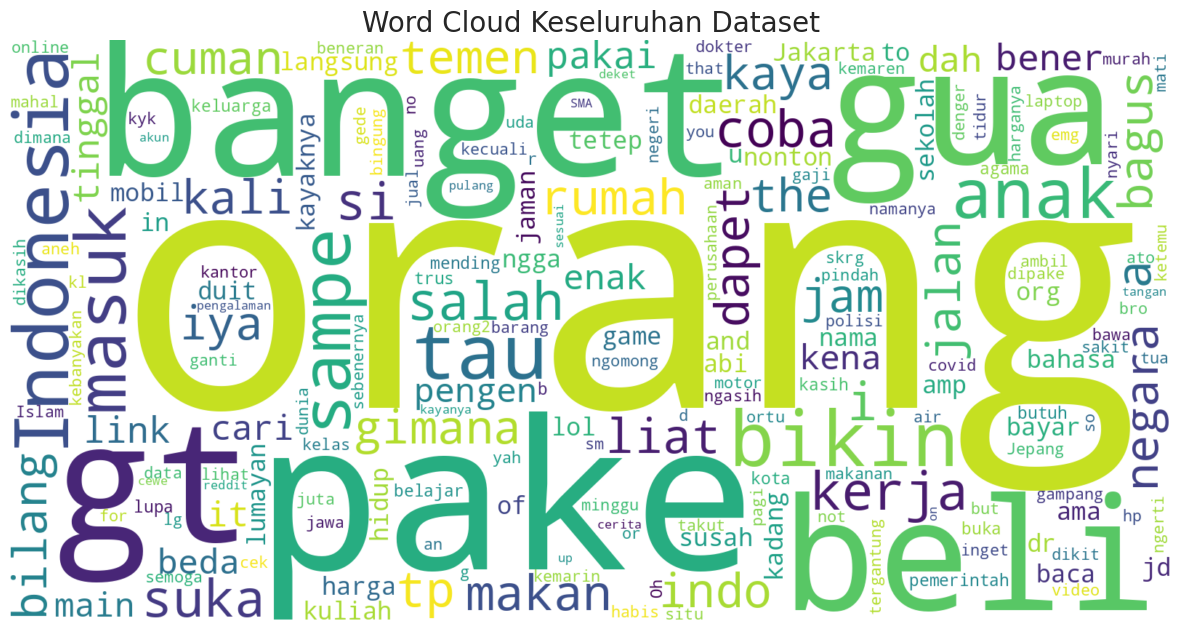

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ==============================================================================
# 1. Word Cloud untuk Keseluruhan Dataset
# ==============================================================================
print("Membuat Word Cloud untuk keseluruhan dataset...")

# Ambil sampel dari keseluruhan data
text_all = " ".join(text for text in df_all.sample(40000, random_state=42))

# Buat dan tampilkan Word Cloud
wordcloud_all = WordCloud(stopwords=stopwords_ind, background_color="white",
                          width=1600, height=800, collocations=False).generate(text_all)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('Word Cloud Keseluruhan Dataset', fontsize=20)
plt.axis("off")
plt.show()


Membuat Word Cloud perbandingan untuk setiap kelas...


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


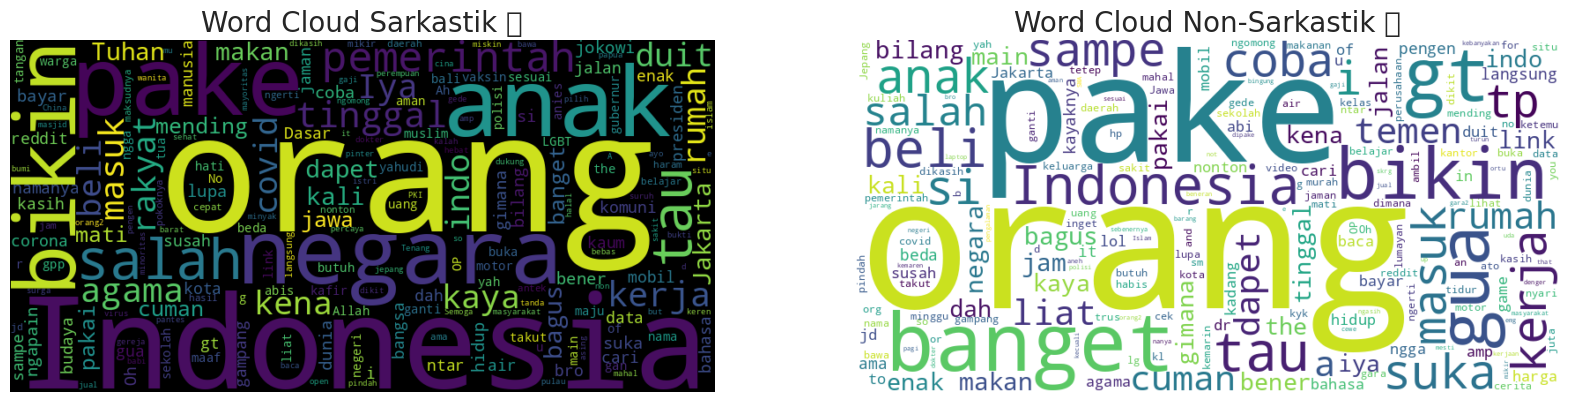

In [22]:

# ==============================================================================
# 2. Word Cloud Terpisah untuk Perbandingan Antar Kelas
# ==============================================================================
print("\nMembuat Word Cloud perbandingan untuk setiap kelas...")

# Ambil sampel dari masing-masing kelas (kode Anda sudah benar)
# Perbaikan kecil: karena df_sarcastic sudah Series, tidak perlu ['text'] lagi
text_sarcastic = " ".join(text for text in df_sarcastic.sample(3529, random_state=42))
text_non_sarcastic = " ".join(text for text in df_non_sarcastic.sample(20000, random_state=42))

# Buat objek WordCloud untuk masing-masing
wordcloud_sarcastic = WordCloud(stopwords=stopwords_ind, background_color="black",
                                width=800, height=400, collocations=False).generate(text_sarcastic)
wordcloud_non_sarcastic = WordCloud(stopwords=stopwords_ind, background_color="white",
                                    width=800, height=400, collocations=False).generate(text_non_sarcastic)

# Tampilkan Word Clouds berdampingan
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(wordcloud_sarcastic, interpolation='bilinear')
axes[0].set_title('Word Cloud Sarkastik 🔥', fontsize=20)
axes[0].axis("off")

axes[1].imshow(wordcloud_non_sarcastic, interpolation='bilinear')
axes[1].set_title('Word Cloud Non-Sarkastik 👍', fontsize=20)
axes[1].axis("off")

plt.show()

## TANDA BACA DAN HURUF KAPITAL

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import re
import numpy as np

# Pastikan 'df' adalah DataFrame Anda yang sudah bersih dan memiliki struktur yang benar
# Ganti 'text' dengan nama kolom yang sesuai jika berbeda
NAMA_KOLOM_TEKS_ANDA = 'body'

# ==============================================================================
# BAGIAN 1: EKSTRAKSI FITUR (PROSES INI AMAN UNTUK RAM)
# ==============================================================================
print("Memulai proses ekstraksi fitur dari keseluruhan data...")

# Siapkan list kosong untuk menampung hasil perhitungan dari setiap baris
ellipsis_counts = []
q_exclaim_counts = []
multi_exclaim_counts = []
uppercase_ratios = []
has_url_flags = []
has_mention_flags = []

# Regex untuk mendeteksi URL dan user mentions
url_pattern = re.compile(r'https?://\S+')
mention_pattern = re.compile(r'u/\w+')

# Loop melalui setiap teks dalam DataFrame
for text in tqdm(df_rapi[NAMA_KOLOM_TEKS_ANDA]):
    # --- 1. Analisis Tanda Baca ---
    ellipsis_counts.append(text.count('...'))
    q_exclaim_counts.append(text.count('?!'))
    multi_exclaim_counts.append(len(re.findall(r'!!+', text))) # Menemukan '!!' atau lebih

    # --- 2. Analisis Huruf Kapital ---
    n_upper = sum(1 for char in text if char.isupper())
    n_letters = sum(1 for char in text if char.isalpha())
    ratio = n_upper / n_letters if n_letters > 0 else 0
    uppercase_ratios.append(ratio)

    # --- 3. Analisis Entitas Reddit ---
    has_url_flags.append(1 if url_pattern.search(text) else 0)
    has_mention_flags.append(1 if mention_pattern.search(text) else 0)

# Tambahkan semua list yang sudah terisi sebagai kolom baru ke DataFrame
print("\nMenambahkan fitur-fitur baru ke DataFrame...")
df_rapi['ellipsis_count'] = ellipsis_counts
df_rapi['q_exclaim_count'] = q_exclaim_counts
df_rapi['multi_exclaim_count'] = multi_exclaim_counts
df_rapi['uppercase_ratio'] = uppercase_ratios
df_rapi['has_url'] = has_url_flags
df_rapi['has_mention'] = has_mention_flags

print("✅ Ekstraksi fitur selesai!")

Memulai proses ekstraksi fitur dari keseluruhan data...


  0%|          | 0/2619864 [00:00<?, ?it/s]


Menambahkan fitur-fitur baru ke DataFrame...
✅ Ekstraksi fitur selesai!




📊 Analisis Tanda Baca per Kelas (Total Penggunaan)
       ellipsis_count  q_exclaim_count  multi_exclaim_count
label                                                      
0              120612             2799                 8081
1                 184               11                   44


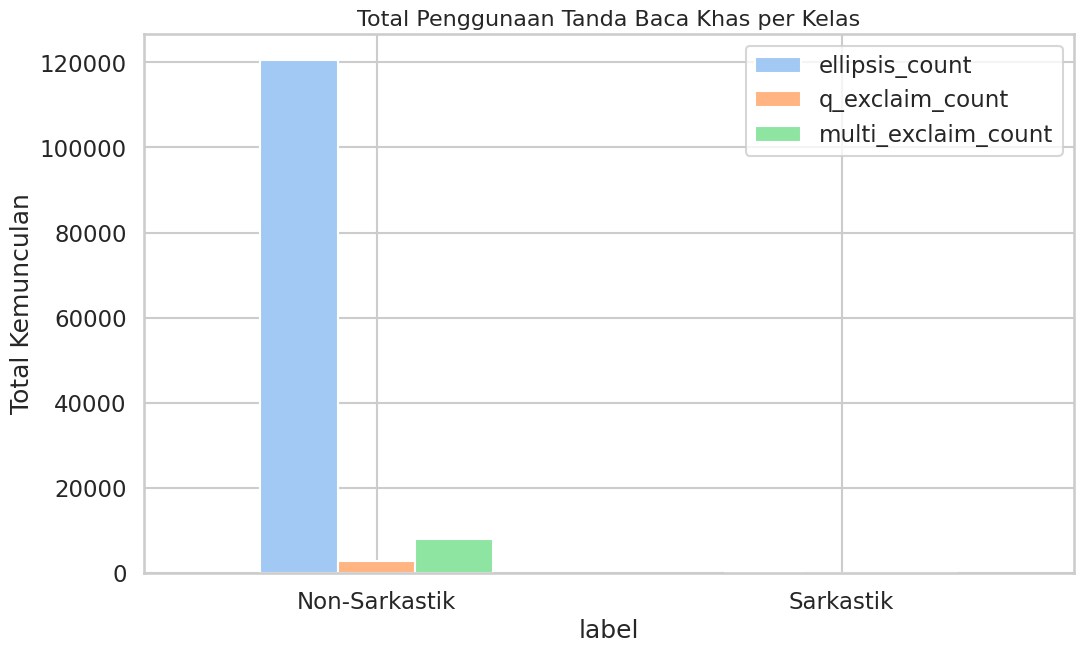



📊 Analisis Rasio Huruf Kapital per Kelas


In [ ]:

# ==============================================================================
# BAGIAN 2: ANALISIS & VISUALISASI HASIL
# (Semua operasi di bawah ini sangat ringan dan aman untuk RAM)
# ==============================================================================

# --- 1. Hasil Analisis Tanda Baca ---
punctuation_analysis = df_rapi.groupby('label')[['ellipsis_count', 'q_exclaim_count', 'multi_exclaim_count']].sum()
print("\n\n" + "="*50)
print("📊 Analisis Tanda Baca per Kelas (Total Penggunaan)")
print("="*50)
print(punctuation_analysis)

# Visualisasi
punctuation_analysis.plot(kind='bar', figsize=(12, 7), rot=0)
plt.title('Total Penggunaan Tanda Baca Khas per Kelas', fontsize=16)
plt.ylabel('Total Kemunculan')
plt.xticks([0, 1], ['Non-Sarkastik', 'Sarkastik'])
plt.show()

# --- 2. Hasil Analisis Huruf Kapital ---
print("\n\n" + "="*50)
print("📊 Analisis Rasio Huruf Kapital per Kelas")
print("="*50)
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_rapi, x='uppercase_ratio', hue='label', fill=True, common_norm=False, clip=(0,1))
plt.title('Distribusi Rasio Huruf Kapital per Kelas', fontsize=16)
plt.xlabel('Rasio Huruf Kapital (0.0 = semua huruf kecil, 1.0 = semua huruf kapital)')
plt.ylabel('Kepadatan (Density)')
plt.legend(title='Label', labels=['1: Sarkastik', '0: Non-Sarkastik'])
plt.show()

# --- 3. Hasil Analisis Entitas Reddit ---
entity_analysis = df_rapi.groupby('label')[['has_url', 'has_mention']].mean() * 100
print("\n\n" + "="*50)
print("📊 Analisis Entitas Reddit per Kelas (% Komentar)")
print("="*50)
print(entity_analysis.rename(columns={'has_url': '% Mengandung URL', 'has_mention': '% Mengandung Mention'}))

# Visualisasi
entity_analysis.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Persentase Komentar yang Mengandung URL/Mention per Kelas', fontsize=16)
plt.ylabel('% dari Total Komentar di Kelas Tersebut')
plt.xticks([0, 1], ['Non-Sarkastik', 'Sarkastik'])
plt.show()